## Unsupervised Learning: k-Means Clustering
---------
We hope you enjoy the tutorial! Before we start diving into the material, let's make sure that you have your environment up and running. Simply run the code below -- if things break, you can install the dependencies using pip or conda.

## 0. Setup

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time

## 1. What's Unsupervised Learning?

The basic notion behind machine learning is that you're given a dataset with an interesting backstory, and it's up to you to figure out what that story is.  Maybe you want to predict the next big thing that will break the stock market, or understand the relationship between students' stress levels and pounds of chocolate consumption.  In both cases, you're looking at the interactions of several different things and uncovering the hidden patterns that allow you to draw insightful conclusions from this data.

We can break down such problems into two categories: supervised and unsupervised.
- Supervised learning is when your explanatory variables X come with an associated reponse variable Y.  You get a sneak peak at the true "labels": for example, for all the participants in a clinical trial, you're told whether their treatments were successful or not.
- In *unsupervised learning*, sorry -- no cheating.  You get a bunch of X's without the Y's.  There's some ground truth we don't have access to.  So we have to do our best to extract some meaning out of the data's underlying structure and check to make sure that our methods are robust. 

One example of an unsupervised learning algorithm is clustering, which we'll practice today!

## 2. Clustering

Clustering is what it sounds like: grouping “similar” data points into *clusters* or *subgroups*, while keeping each group as distinct as possible.  The data points belonging to different clusters should be different from each other, too.  Often, we'll come across datasets that exhibit this kind of grouped structure.  **k-Means** is one of many ways to perform clustering on your data.

But wait -- these are vague concepts.  What does it mean for two data points to be "similar?"  And are we actually moving the points around physically when we group them together? 

These are all good questions, so let’s walk through some vocab before we walk through the steps of the k-means clustering algorithm:

> ### 2a. Similarity
Intuitively, it makes sense that similar things should be close to each other, while different things should be far apart.  To formalize the notion of **similarity**, we choose a **distance metric** (see below) that quantifies how "close" two points are to each other.  The most commonly used distance metric is Euclidean distance (think: distance formula from middle school), and that's what we'll use in our example today.  We'll introduce other distance metrics towards the end of the notebook. 

> ### 2b. Cluster centroid
The **cluster centroid** is the most representative feature of an entire cluster.  We say "feature" instead of "point" because the centroid may not necessarily be an existing data point of the cluster.  To find a cluster's centroid, average the values of all the points belonging to that cluster.  Thus, the cluster centroid gives nice summary information about all the points in its cluster.  Think of it as the cluster's (democratic) president.

## 3. The k-means Algorithm
---
The k-means algorithm has a simple objective: given a set of data points, it tries to separate them into *k* distinct clusters. It uses the same principle that we mentioned earlier: keep the data points within each cluster as similar as possible. You have to provide the value of **k** to the algorithm, so you should have a general idea of how many clusters you expect to see in the data. 

Let’s start by tossing all of our data points onto the screen to see what the data actually looks like. This kind of exploratory data visualization can provide a rough guide as to how to start clustering our data. Remember that clustering is an *unsupervised learning method*, so we’re never going to have a perfect answer for our final clusters. But let’s do our best to get results that are **reasonable** and **replicable**.
- Replicable: someone else can arrive at our results from a different starting point
- Reasonable: our results show some correlation with what we expect to encounter in real life

Let's take a look at a toy example:

![alt-text](http://pubs.rsc.org/services/images/RSCpubs.ePlatform.Service.FreeContent.ImageService.svc/ImageService/Articleimage/2012/AN/c2an16122b/c2an16122b-f3.gif "k-means clustering algorithm")

> ##### (a) 
Our data seems to have some sort of underlying structure. Let’s use this information to initialize our k-means algorithm with k = 3 clusters. For now we assume that we know how many clusters we want, but we’ll go into more detail later about relaxing this assumption and how to choose “the best possible k”. 

> ##### (b) 
We want 3 clusters, so first we randomly “throw down” three random cluster centroids. Every iteration of k-means will eventually "correct" them towards the right clusters. Since we are heading to a correct answer anyway, we don't care about where we start. 

> These centroids are our “representative points” -- they contain all the information that we need about other points in the same cluster. It makes sense to think about centroids as being the physical center of each cluster. So let’s pretend that our randomly initialized cluster centers are the actual centroids, and group our points accordingly. Here we use our distance metric of choice -- Euclidean distance. For every data point, we compute its distance to each centroid, and assign the data point whichever centroid is closest (smallest distance).

> ##### (c)
Now we have something that’s starting to resemble three distinct clusters! But we need to update the centroids that we started with -- we’ve just added in a bunch of new data points to each cluster, so we need our “representative point,” the centroid, to reflect that. 

> ##### (d)-(e)-(f)-(g)
Let's average all the values within each cluster and call that our new centroid. These new centroids are further "within" the data than the older centroids. 

> Notice that we’re not quite done yet -- we have some straggling points which don’t seem to belong to any cluster. Let’s run another iteration of k-means and see if that separates out the clusters better. This means that we’re computing the distances from each data point to every centroid, and re-assign those that are closer to centroids of another cluster.

> ##### (h)
We keep computing the centroids for every iteration using the steps (c) and (d). After a few iterations, maybe you notice that the clusters don’t change after a certain point. This actually turns out to be a good criterion for stopping the cluster iterations!

> There’s no need to keep running the algorithm if our answer doesn't change after a certain point in time. That's just wasting time and computational resources. We can formalize this idea of a “stopping criterion.” We define a small value, call it “epsilon”, and terminate the algorithm when the change in cluster centroids is less than epsilon. This way, epsilon serves as a measure of how much error we can tolerate.   

## 4. Image Segmentation Example

Let's move on to a real-life example. You can access images in the `datasets/kmeans/imgs` folder. 

- We know that images often have a few dominant colors -- for example, the bulk of an image is often made up of the foreground color and background color.

- In this example, we'll write some code that uses `scikit-learn`'s k-means clustering implementation to find what these dominant colors may be. `scikit-learn`, or `sklearn` for short, is a package of built-in machine learning algorithms all coded up and ready to use. 

- Once we know what the most important colors are in an image, we can compress (or "quantize") the image by re-expressing the image using only the set of k colors that we get from the algorithm. Let's try it!

In [2]:
# let's list what images we have to work with
imgs = os.listdir('datasets/kmeans/imgs/')
print(imgs)

['leo_bb.png', 'mario.png']


Let's use an image of Leo's beautiful, brooding face for our code example.

Using image 0: path datasets/kmeans/imgs/leo_bb.png


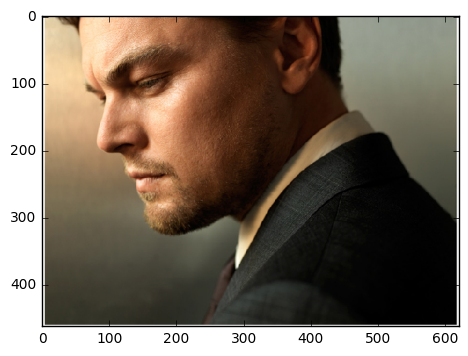

In [3]:
img_path = os.path.join('datasets/kmeans/imgs/', imgs[0])
print('Using image 0: path {}'.format(img_path))

img = mpimg.imread(img_path)

# normalize the image values
img = img * 1.0 / img.max()

imgplot = plt.imshow(img)

An image is represented here as a three-dimensional array of floating-point numbers, which can take values from 0 to 1. If we look at ``img.shape``, we'll find that the first two dimensions are x and y, and then the last dimension is the color channel. There are three color channels (one each for red, green, and blue). A set of three channel values at a single (x, y)-coordinate is referred to as a "pixel".

We're going to use a small random sample of 10% of the image to find our clusters.

In [4]:
print('Image shape: {}'.format(img.shape))
width, height, num_channels = img.shape
num_pixels = width * height
num_sample_pixels = num_pixels / 10

print('Sampling {} out of {} pixels'.format(num_sample_pixels, num_pixels))

Image shape: (462, 621, 3)
Sampling 28690 out of 286902 pixels


Next we need to reshape the image data into a single long array of pixels (instead of a two-dimensional array of pixels) in order to take our sample.

In [5]:
img_reshaped = np.reshape(img, (num_pixels, num_channels))
img_sample = shuffle(img_reshaped, random_state=0)

Now that we have some data, let's construct our k-means object and feed it some data. It will find the best k clusters, as determined by a distance function.

In [6]:
# We're going to try to find the 20 colors which best represent the colors in the picture.
K = 20

t0 = time()
kmeans = KMeans(n_clusters=K, random_state=0)

# actually running kmeans is super simple!
kmeans.fit(img_sample)
print("K-means clustering complete. Elapsed time: {} seconds".format(time() - t0))

K-means clustering complete. Elapsed time: 15.2659220695 seconds


The center of each cluster represents a color that is significant in the image. We can grab the values of these colors from `kmeans.cluster_centers_`. We can also call `kmeans.predict()` to match each pixel in the image to the closest color, which will let us know the size of each cluster (and also serve as a way to quantize the image)

In [7]:
# There are K cluster centers, each of which is a RGB color
kmeans.cluster_centers_

array([[ 0.59594023,  0.37377197,  0.23699242],
       [ 0.07824585,  0.06161205,  0.04534107],
       [ 0.98117697,  0.98098147,  0.97990966],
       [ 0.29123059,  0.28127983,  0.22996978],
       [ 0.88017613,  0.67859817,  0.51104909],
       [ 0.52016801,  0.51832098,  0.43664253],
       [ 0.37142357,  0.3536061 ,  0.2840144 ],
       [ 0.27072299,  0.13391563,  0.05868939],
       [ 0.97850031,  0.85233569,  0.70350802],
       [ 0.47486466,  0.27632579,  0.16393569],
       [ 0.67109919,  0.48759544,  0.33595228],
       [ 0.01431993,  0.01277512,  0.01052323],
       [ 0.47390169,  0.43343523,  0.33971789],
       [ 0.21901846,  0.21610278,  0.17843075],
       [ 0.57573938,  0.59766436,  0.536443  ],
       [ 0.17545493,  0.07990164,  0.03137593],
       [ 0.3704485 ,  0.19818981,  0.1059725 ],
       [ 0.15592512,  0.15792704,  0.13496453],
       [ 0.93447602,  0.77906561,  0.61215806],
       [ 0.78221744,  0.57008743,  0.40647745]], dtype=float32)

In [8]:
t0 = time()
labels = kmeans.predict(img_reshaped)
print("k-means labeling complete. Elapsed time: {} seconds".format(time() - t0))

k-means labeling complete. Elapsed time: 0.0658421516418 seconds


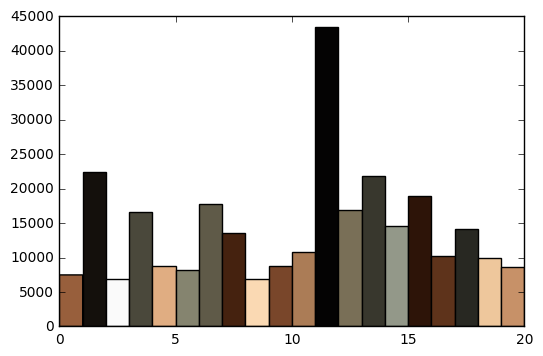

In [9]:
# construct a histogram of the points in each cluster
n, bins, patches = plt.hist(labels, bins=range(K+1))

# a bit of magic to color the bins the right color
for p, color in zip(patches, kmeans.cluster_centers_):
    plt.setp(p, 'facecolor', color)

As you can tell from the above histogram, the most dominant color in the scene is the background color, followed by a large drop down to the foreground colors. This isn't that surprising, since visually we can see that the space is mostly filled with the background color -- that's why it's called the "background"!

Now, let's redraw the scene using only the cluster centers! This can be used for image compression, since we only need to store the index into the list of cluster centers and the colors corresponding to each center, rather than the colors corresponding to each pixel in the original image.

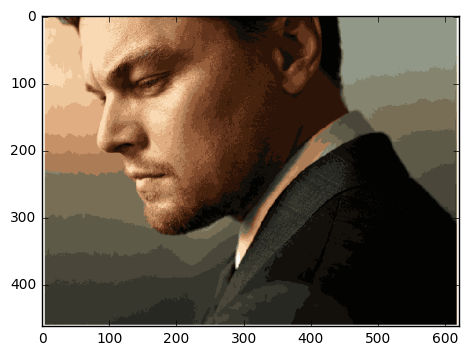

In [10]:
quantized_img = np.zeros(img.shape)
for i in range(width):
    for j in range(height):
        # We need to do some math here to get the correct
        # index position in the labels array
        index = i * height + j
        quantized_img[i][j] = kmeans.cluster_centers_[labels[index]]

quantized_imgplot = plt.imshow(quantized_img)

Note that the image looks similar, but the gradients are no longer as smooth, and there are a few image artifacts scattered throughout. This is because we're only using the k most representative colors, which excludes the steps along the gradient.

Try running the code again with a different image, or with a different value of k!

## 5. Limitations, Extensions and the basis of some assumptions used above

### I. Choosing the Right K
In the first toy example, we started with k = 3 centroids. If you're wondering how we arrived at this magic number and why, read on. 

> #### I. (a) Known number of centroids (Relatively Easy)
Sometimes, you may be in a situation where the number of clusters is provided to you beforehand. For example, you may be asked to categorize a vast range of different bodily actions to the three main subdivisions of the brain (cerebrum, cerebellum, and medulla). Here you know to look for three main clusters where each cluster will represent a specific part of the brain, so you will use three centroids. 
    
> #### I. (b) Unknown number of centroids (Hard)
However, you often do not know how many centroids to pick up from your data. Two extreme situations can happen.
* You could end up making every point its own representative (a perfect centroid) at the risk of losing grouping tendencies. This is called the overfitting problem. While each point perfectly represents itself, it gives you no summary information, no insight, about the data as a whole.
* You could end up choosing only one centroid from all the data (a perfect grouping). Since there is no way to generalize an enormous volume of data to one point, this method also fails to produce relevant distinguishing features from the data. This is like saying that all people in the world drink water, so we can cluster them all by this one  feature. In Machine Learning terminology, this is called the underfitting problem.

> #### I. (c) How to find how many centroids should be in a cluster? 
Unfortunately, there’s no easy way to determine the optimal value of k. It’s a hard problem: we must balance out the number of clusters that makes the most sense for our data, yet make sure that we don’t overfit our model to the exact dataset at hand. There are a few ways that we can address this:

> The most intuitive explanation is the idea of **stability**. If the clusters we obtain represent a true, underlying pattern in our data, then the clusters shouldn’t change much on separate but similar samples. So if we randomly subsample or split our data into smaller parts and run the clustering algorithm again, the cluster memberships shouldn’t drastically change. If they did, then our clusters might be too finely-tuned to the random noise in our data. Therefore, we can compute “stability scores” for a fixed value of k and observe which value of k produces the most stable clusters. This idea of *perturbation* is also really important for machine learning in general.

> We can also use **penalization approaches**, where we use different criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to keep the value of k under control. 

> #### I. (d) What if we can’t cluster the data?
* In the tutorial above, we try to classify each point into one of K clusters. But sometimes, maybe you are clustering based on a feature that is not so exclusive. For example, people usually enjoy more than one genre of music, or food. It would be pretty difficult to form a clustering system such that a person can be a fan of ice-cream or a fan of tiramisu but not both. Hence when we need to "share" members of clusters, we can use **probabilistic clustering** or **fuzzy clustering**. 

### II. What features should I use? 

If you are still getting questionable results, then the features on which you are trying to cluster may not be good indicators. Consider, for example, a clustering algorithm which clusters people into economic categories based on how many Buzzfeed quizzes they take per week. While you may get a clustering, you know that Buzzfeed quizzes are not empirical indicators of earning potential (personal opinions may differ). The motto is: **garbage metrics will give you garbage clusters**. 

### III. Distance Metric

We used the Euclidean distance to find out which points are most closely related to each other. Depending on the distance metric you're using, you can get a different set of clusters. 

The choice of the distance metric depends on the characteristics of your data. For example, distances between "how alike are these faces?" cannot be properly determined by an Euclidean distance metric. DNA and biological data often use non-Euclidean distance metrics. 

[A list of commonly used distance metrics](http://www.mathworks.com/help/stats/kmeans.html?refresh=true)

### IV. I have too many features. How do I find the most relevant ones to cluster with?

When you encounter too many features to cluster on (and can't choose which one should be the basis of clustering), you can use a machine learning hack called [Principal Components Analysis](http://setosa.io/ev/principal-component-analysis/). While we don't cover PCA here, the takeaway is that PCA can reduce the feature space you work with, by ranking the most relevant eigenvectors of the data in decreasing order of relevance. 

Other reasons to use PCA include:
* You want to plot multi-dimensional data on a 2D graph (PCA equivalent: render only the first two eigenvectors)
* You want to minimize computational cost (PCA gives you fewer features to process. More features = more time to compute distances = less time to celebrate results.)

## 6. Other Clustering Algorithms

K-means is one of several unsupervised clustering algorithms, and each method has its strengths and weaknesses. K-means, for example, scales well for the number of data points but not for the number of clusters. It also optimizes for the given number of k, which means that it gives wonky results for values of k that don’t make sense in the context of the data.

We’ll briefly mention two other clustering methods that bypass these challenges. 

> #### Hierarchical Clustering
For hierarchical clustering, there’s no need to worry about the best number of clusters. The algorithm cranks through each data point, grouping the most similar ones together until it ends up with a bunch of small clusters. Then, it clusters these clusters together until you’re left with one giant super-cluster. 

> #### Expectation-Maximization (EM)
EM is *the generalized* clustering algorithm. It views the data as a mixture of different distributions, and tries to find what those distributions are accordingly. It’s a **probabilistic clustering method**, though, in that it doesn’t assign each data point to a fixed cluster. Instead, it determines the probabilities with which each point belongs to each cluster. For example, it may find that a point belongs to cluster 1 with probability 0.95, and cluster 2 with probability 0.05. It iteratively estimates the cluster assignment probabilities and computes the distributional parameters for each cluster.

## 7. Further Reading
* [Heavy-duty unsupervised learning resource](http://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf)
* [Bags of Words to Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-3-more-fun-with-word-vectors) (super fun Kaggle tutorial that you can do!)
* [An Introduction to Statistical Learning in R - James, Witten, Hastie, Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf) (awesome textbook)
* [Elements of Statistical Learning (ESL) - Friedman, Hastie, Tibshirani](http://statweb.stanford.edu/~tibs/ElemStatLearn/)
* [Pattern Recognition and Machine Learning - Bishop](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)